# $M_D$ vs $v_S\approx m_{\chi^0_1}$ analog to the SD majorana DM: $h_d=1$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

# PMNS matrix 2018 to $3\sigma$ https://arxiv.org/abs/1708.01186

In [3]:
import NEUTRINO2018
import neutrino_analytic3

In [38]:
#!/usr/bin/env python

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 5

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    vevSM = 244.874425
    MS12 = 9.0E+06
    MS22 = MS12
    LamS1H = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(-1))))
    LamS2H = LamS1H
    LamSPH = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(-1))))
    LamS = 0.     
    LamSP = 1.0E-01    #ms ~ sqrt(2*lambdaSP)*vs -> bigg, i.e. mh2 heavier
    vS = np.exp(np.random.uniform(np.log(10**(2)),np.log(3.*10**(4))))
    YRD = 1.0
    YRC = 1.0E-01
    MDF = np.exp(np.random.uniform(np.log(10**(2)),np.log(10**(4))))
    #MDF = vS*YRC/np.sqrt(2) + np.random.uniform(0.5,10.)
    
    ###  NEUTRINO EXPERIMENTAL VALUES ###################################################
    #phases of the PMNS matrix and the R 
    phases1 = np.random.uniform(0.,0.0*np.pi,3) # WARNING! They are in zero
    delta = phases1[0]
    eta1 = phases1[1]
    eta2 = phases1[2]
    #light neutrino masses (up 3 sigma range) NH (NO)
    #mnu1 = 10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9 
    #Zero in this framework
    mnu1 = 1.0e-20
    mnu2 = np.sqrt(np.random.uniform(7.05e-5,8.14e-5)*1.0e-18+mnu1**2)
    mnu3 = np.sqrt(np.random.uniform(2.41e-3,2.60e-3)*1.0e-18+mnu1**2)
    #mixing angles (up 3 sigma range) NH
    t12 = np.arcsin(np.sqrt(np.random.uniform(0.273,0.379)))
    t23 = np.arcsin(np.sqrt(np.random.uniform(0.445,0.599)))
    t13 = np.arcsin(np.sqrt(np.random.uniform(0.0196,0.0241)))
    #Building PMNS matrix NH
    UM12 = np.array([ [np.cos(t12),np.sin(t12),0.], [-np.sin(t12),np.cos(t12),0.], [0.,0.,1.0] ])
    UM13 = np.array([ [np.cos(t13),0.,np.sin(t13)], [0.,1.0,0.], [-np.sin(t13),0.,np.cos(t13)] ])
    UM23 = np.array([ [1.0,0.,0.], [0.,np.cos(t23),np.sin(t23)], [0.,-np.sin(t23),np.cos(t23)] ])
    Uphases = np.array([ [np.exp(eta1*1j),0.,0.], [0.,np.exp(eta2*1j),0.], [0.,0.,1.0] ])
    U=np.dot(UM23,np.dot(UM13,np.dot(UM12,Uphases)))
    #Defining the U elementes. readeable
    U11 = np.real(U[0,0])
    U12 = np.real(U[0,1])
    U13 = np.real(U[0,2])
    U21 = np.real(U[1,0])
    U22 = np.real(U[1,1])
    U23 = np.real(U[1,2])
    U31 = np.real(U[2,0])
    U32 = np.real(U[2,1])
    U33 = np.real(U[2,2])
    
    ### Algoritm to compute LAMBDAi elements
    MS1 = np.sqrt(LamS1H*vevSM**2/2.+MS12)
    MS2 = np.sqrt(LamS2H*vevSM**2/2.+MS22)
    M1 = neutrino_analytic3.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M1']
    M2 = neutrino_analytic3.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M2']
    vv12 = neutrino_analytic3.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V12']
    vv22 = neutrino_analytic3.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V22']
    uu11 = neutrino_analytic3.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U11']
    uu21 = neutrino_analytic3.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U21']
    L1 = neutrino_analytic3.LAMBDA(M1,MS1,vv12,uu11)+ neutrino_analytic3.LAMBDA(M2,MS1,vv22,uu21)
    L2 = neutrino_analytic3.LAMBDA(M1,MS2,vv12,uu11)+ neutrino_analytic3.LAMBDA(M2,MS2,vv22,uu21)
    
    #####  ALGORITM: Particular case(see): inversion-neutrino-matrix.nb ######################
    a11 = 0.0
    a12 = 0.0 
    ### Random -> FREE PARAMETERS
    a21 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a22 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a31 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))    
    a32 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    ### Solved in Mathematica
    b11 = -((a32*mnu2*U12 - a22*mnu3*U13)/(a22*a31*L1 - a21*a32*L1))   
    b21 = -((a32*mnu2*U22 - a22*mnu3*U23)/(a22*a31*L1 - a21*a32*L1))
    b31 = -((a32*mnu2*U32 - a22*mnu3*U33)/(a22*a31*L1 - a21*a32*L1))
    b12 = (a31*mnu2*U12 - a21*mnu3*U13)/(a22*a31*L2 - a21*a32*L2)
    b22 = (a31*mnu2*U22 - a21*mnu3*U23)/(a22*a31*L2 - a21*a32*L2)
    b32 = (a31*mnu2*U32 - a21*mnu3*U33)/(a22*a31*L2 - a21*a32*L2)
    
    ###  Modify the LesHouches file   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    ###  Modify the LesHouches file 
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %a11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %a21    
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %a31     
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %a12  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %a22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %a32        
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %b11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %b21     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %b31 
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %b12  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %b22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %b32      
    
    ###  Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    ### Run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    ###  Run micromegas and take the relic density. 
    '''
    mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega') #Only DM
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    
    # Choose Omega at to 3 sigma
    if Omega > 0.5:
        continue
    if Omega < 0.04:
        continue
    '''
    mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega_with_DI_Detection') #Full
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    print("n=",n,"Omega=",Omega)
    
    ### Direct Detection: CDM-nucleon cross sections[pb]
    PSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    PSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[4])
    NSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])
    NSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[9])
    ### Indirect Detection: annihilation cross section vcs[cm^3/s]
    sv = eval(mo.split('annihilation cross section')[1].split()[0])
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])
    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])
    
    ### EWPO
    T = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[5])
    S = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[11])
    U = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[17])
    ### LFV
    mueg = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[6])
    taumug = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[16])
    #Scalar Higgs mixing
    ZH11 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[6])
    ZH12 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[11])
    ZH21 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[16])
    ZH22 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[21])
    
    #Higgs to two photons
    if len(SPheno_output.split('BR(hh_1 -> VP VP )'))==1:
        BRh1gg = 0.
    else:
        r = len(SPheno_output.split('BR(hh_1 -> VP VP )')[0].split())
        BRh1gg = eval(SPheno_output.split('BR(hh_1 -> VP VP )')[0].split()[r-5])

    if len(SPheno_output.split('BR(hh_2 -> VP VP )'))==1:
        BRh2gg = 0.
    else:
        r = len(SPheno_output.split('BR(hh_2 -> VP VP )')[0].split())
        BRh2gg = eval(SPheno_output.split('BR(hh_2 -> VP VP )')[0].split()[r-5])        

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,a11,a21,a31,a12,a22,a32,\
              b11,b21,b31,b12,b22,b32,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM,Omega,PSI,PSD,NSI,NSD,T,S,U,mueg,taumug,sv,\
              ZH11,ZH12,ZH21,ZH22,BRh1gg,BRh2gg])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13'\
                           ,'YRB21','YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha'\
                           ,'mChi1','mChi2','XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM'\
                          ,'Omega','PSI','PSD','NSI','NSD','T','S','U','mueg','taumug','sv','ZH11','ZH12','ZH21'\
                           ,'ZH22','BRh1gg','BRh2gg'])
xd.to_csv('xd_scan1.csv')

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

n= 0 Omega= 28100.0
n= 2 Omega= 0.163
The program spent 6.996251344680786 s running 5 times


In [43]:
#Concatenar files
xd0 = pd.read_csv('hc01hd1.csv')
#File got in Jupyter
#xdnew = pd.read_csv('xd_scan1.csv')
#File got with nohup
xdnew = pd.read_csv('xd_scanhd1-1.csv')

xd = pd.concat([xd0, xdnew],ignore_index=True)
del xd['Unnamed: 0']

print(xd0.shape,xdnew.shape,xd.shape)

(7, 60) (11, 60) (18, 59)


In [44]:
#save file
xd.to_csv('hc01hd1.csv')

In [45]:
xd = pd.read_csv('hc01hd1.csv')
del xd['Unnamed: 0']

In [46]:
xd.shape

(18, 59)

In [16]:
print("Experimental values   :",mnu2, mnu3)
print(" ")
print("Inversion-SPHENO      :",mv2,  mv3)

Experimental values   : 8.40051255392e-12 4.97434665395e-11
 
Inversion-SPHENO      : 8.40047371e-12 4.9743424e-11


In [17]:
print("RUTINE: ",'%.5f' %M1, '%.5f' %M2)
#Works if take the final point
print("SPEHENO:",'%.5f' %mChi1 , '%.5f' %mChi2)

RUTINE:  155.71542 1492.24317
SPEHENO: 155.71542 1492.24320


# Analytical diagonalization rutine for Neutrino mass matriz

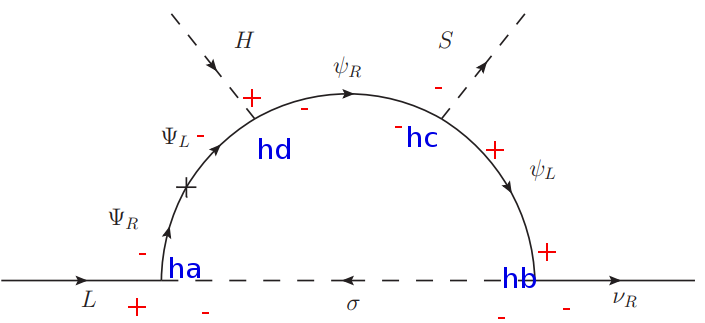

In [18]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

Import the analytical rutine for compute the $\mathcal{M}_{\alpha\beta}$ version two

Example:

In [19]:
#Add to the DataFrame
xd['mn1'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[0]
xd['mn2'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[1]
xd['mn3'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[2]

In [20]:
##WARNING: The vev change in SPheno
xd[['mv1','mn1','mv2','mn2','mv3','mn3']][:3]

,mv1,mn1,mv2,mn2,mv3,mn3
0,2.257889e-19,4.336809e-19,8.931203e-12,8.931204e-12,4.945376e-11,4.945377e-11
1,1.102478e-19,4.336809e-19,4.478551e-12,8.614164e-12,2.600052e-11,5.001010e-11
2,2.271515e-19,0.000000e+00,8.493556e-12,8.493557e-12,4.984233e-11,4.984233e-11


# PLOTS

In [21]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

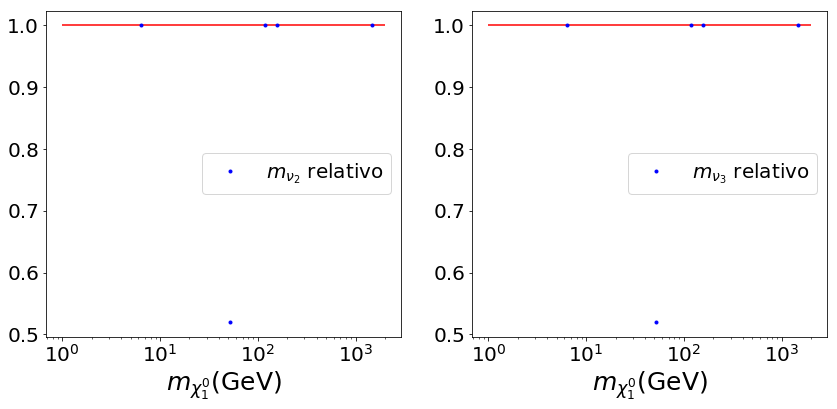

In [22]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.semilogx(xd.mChi1, xd.mv2/xd.mn2, 'b.',label=r'$m_{\nu_2}$ relativo')
plt.hlines(1,1,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.subplot(122)
plt.semilogx(xd.mChi1, xd.mv3/xd.mn3, 'b.',label=r'$m_{\nu_3}$ relativo')
plt.hlines(1,1,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.show()

In [23]:
#Experimental values for DM: Latest Planck results 2018
e = 3
Omega = 0.120
Omega_min=Omega - e*0.001
Omega_max=Omega + e*0.001
print(Omega, Omega_min,Omega_max)

0.12 0.11699999999999999 0.123


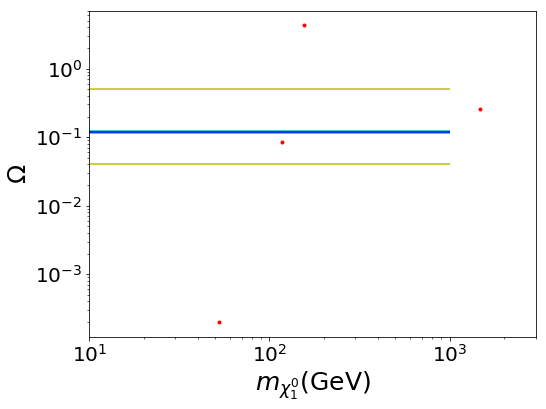

In [24]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mChi1,xd.Omega,'r.')
plt.hlines(Omega_max,1,1e3, 'c',label=r'')
plt.hlines(Omega_min,1,1e3, 'c',label=r'')
plt.hlines(Omega,1,1e3, 'b',label=r'0.11')
plt.hlines(0.5,1,1e3, 'y',label=r'0.11')
plt.hlines(0.04,1,1e3, 'y',label=r'0.11')

#plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\Omega$',size=25)
plt.xlim(10,3e3)
#plt.ylim(11.2e-2,1.3e-1)

plt.show()

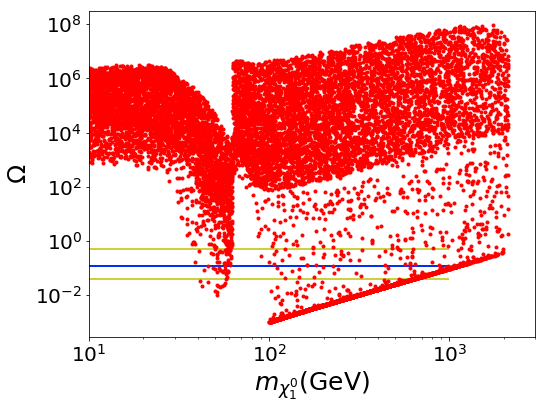

cuts

Maximun values: Some elements tend to be small

In [25]:
print(np.abs(xd.YRB11).max(),np.abs(xd.YRB12).max(),np.abs(xd.YRB13).max())
print(np.abs(xd.YRB21).max(),np.abs(xd.YRB22).max(),np.abs(xd.YRB23).max())

1.32707978891e-06 2.60156912987e-06 5.98500627717e-06
2.38438430093e-07 1.27020242062e-06 1.06322196069e-06


In [26]:
xDM = xd[np.logical_and(xd.Omega<0.14, xd.Omega>0.10)]
xDM1 = xd[np.logical_and(xd.Omega>Omega_max, 1>0)]
xDM2 = xd[np.logical_and(xd.Omega<Omega_min, 1>0)]

In [27]:
xDM.shape

(0, 62)

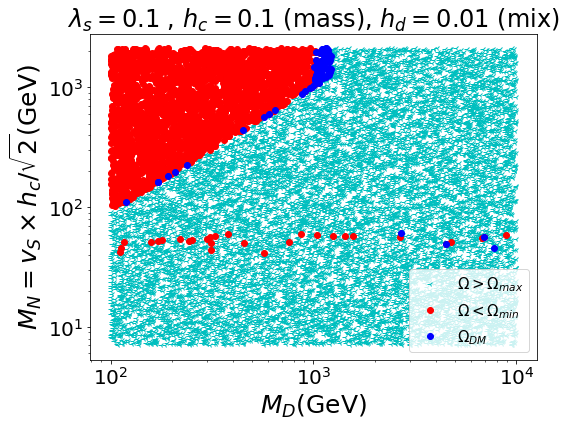

In [23]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'c3',label=r'$\Omega > \Omega_{max}$')
plt.loglog(xDM2.MDF, xDM2.vS*xDM2.YRC/np.sqrt(2),'ro',label=r'$\Omega < \Omega_{min}$')
plt.plot(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'bo',label=r'$\Omega_{DM}$')

plt.title('$\lambda_s=0.$ , $h_c=0.1$ (mass), $h_d=1$ (mix)')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$M_{D}$(GeV)',size=25)
plt.ylabel(r'$M_N=v_S \times h_c /\sqrt{2}$(GeV)',size=25)

#plt.ylim(5,2e3)

plt.show()

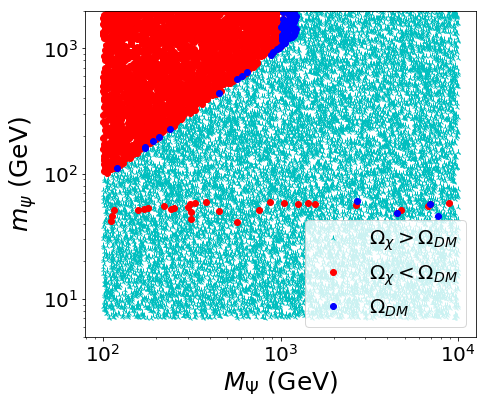

In [24]:
plt.figure(figsize=(7,6))

plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'c2',label=r'$\Omega_\chi > \Omega_{DM}$')
plt.loglog(xDM2.MDF, xDM2.vS*xDM2.YRC/np.sqrt(2),'ro',label=r'$\Omega_\chi < \Omega_{DM}$')
plt.plot(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'bo',label=r'$\Omega_{DM}$')

plt.legend(prop={'size':20},loc='best')
plt.xlabel(r'$M_{\Psi}$ (GeV)',size=25)
plt.ylabel(r'$m_\psi$ (GeV)',size=25)

plt.ylim(5,2e3)

plt.show()

# Experimental Constrainsts after the relic density cut

In [28]:
from indirectdirect import *

# $\sigma_{SI}$

In [29]:
from scipy import interpolate

#Importar un txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

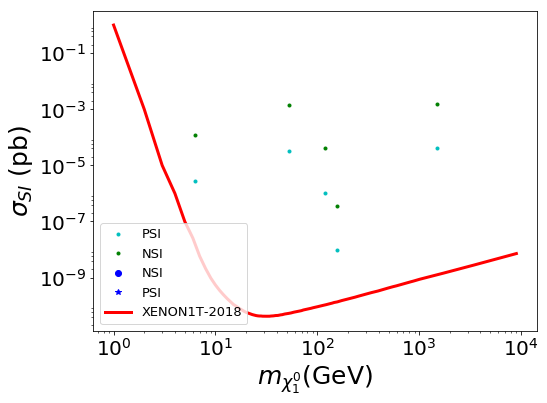

In [30]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mChi1, xd.PSI, 'c.')
plt.loglog(xd.mChi1, xd.NSI, 'g.')
plt.loglog(xDM.mChi1, xDM.NSI, 'bo')
plt.loglog(xDM.mChi1, xDM.PSI, 'b*')

#XENON-1T and LZ
#m=np.linspace(8,1000,2000)
#plt.semilogy(m,sigmaSI_LUX_f(m),'k-',lw=2,label='LUX 2015')
#n=np.linspace(11,1000,1000)
#plt.semilogy(n,sigmaSI_LZ_f(n),'m.',lw=3,label='LZ-SI prospects')
#plot XENON1T-2018
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')


plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
#plt.ylim(1e-16,3e-7)
#plt.xlim(1,5.0E3)
#plt.grid()

plt.tight_layout()
#plt.savefig('plots/sigmaSI_with_neutrino_physics.pdf')

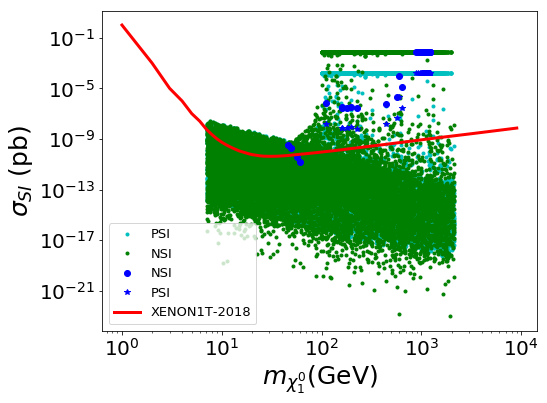

# Analytic expression: $\sigma_{SI}$

In [31]:
#Parameters
fN = 0.25
v = 244.874425
#nucleon mass (proton)
MNC = 938.27*1e-3
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1e+13)**(-2)*1e+36

In [32]:
#Add vertices to the dataframe
xd['cxxh1'] = (xd.YRC*xd.XV12*xd.ZH12 + xd.YRD*xd.XV11*xd.ZH11)*xd.XU12/np.sqrt(2.)
xd['cxxh2'] = (xd.YRC*xd.XV12*xd.ZH22 + xd.YRD*xd.XV11*xd.ZH21)*xd.XU12/np.sqrt(2.)

In [33]:
xd['PSI_anal'] = ((MNC*xd.mChi1/(MNC+xd.mChi1))**2/np.pi)\
*(MNC*fN/xd.vevSM)**2*(xd.cxxh1*xd.ZH11/(xd.mh1)**2 + xd.cxxh2*xd.ZH12/(xd.mh2)**2)**2*GeVtomin2topb

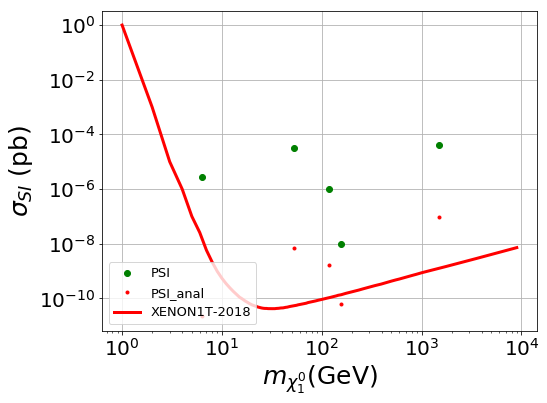

In [34]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mChi1, xd.PSI, 'go')
plt.loglog(xd.mChi1, xd.PSI_anal, 'r.')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()

plt.tight_layout()
#plt.savefig('plots/sigmaSI_P.pdf')

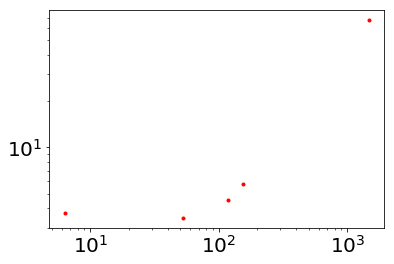

In [35]:
plt.loglog(xd.mChi1, xd.mh2/xd.mh1,'r.')

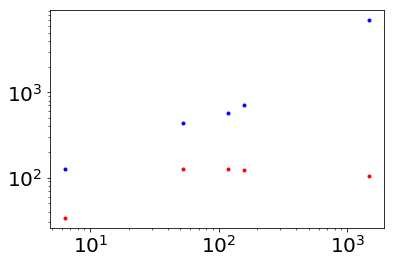

In [36]:
plt.loglog(xd.mChi1, xd.mh1,'r.')
plt.loglog(xd.mChi1, xd.mh2,'b.')

# Sigma v: $\langle\sigma v \rangle$

(1, 5000.0)

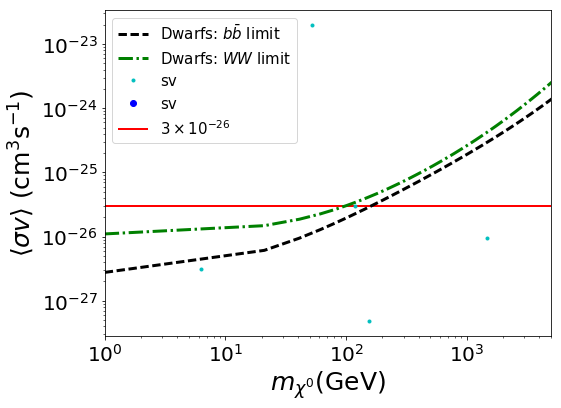

In [37]:
plt.figure(figsize=(8,6))

plt.hlines(3e-26,0.1,1e4,'r',lw=2,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,500)
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=3,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'g-.',lw=3,label=r'Dwarfs: $WW$ limit')

##falto incluir sv en el dataframe :(
plt.loglog(xd.mChi1, xd.sv , 'c.')
plt.loglog(xDM.mChi1, xDM.sv , 'bo')

plt.legend(prop={'size':15},loc='best')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)

#plt.ylim(1e-35,1e-24)
plt.xlim(1,5e3)

(1, 5000.0)

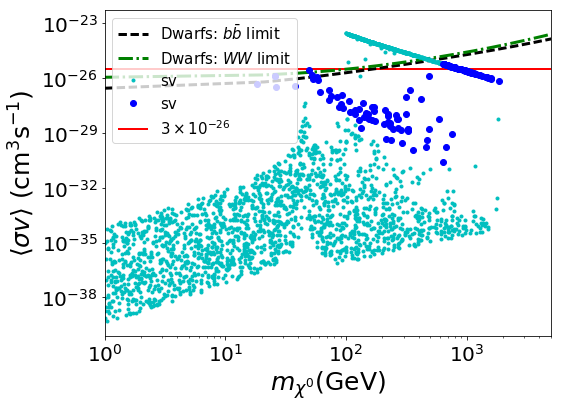